## Decision Trees
- Decision trees are a widely used models for classification and regression tasks.
Essentially, they learn a hierarchy of “if-else” questions, leading to a decision.
Imagine you want to distinguish between the following four animals: bears, hawks,
penguins and dolphins.
Your goal is to get to the right answer by asking as few if-else questions as possible.
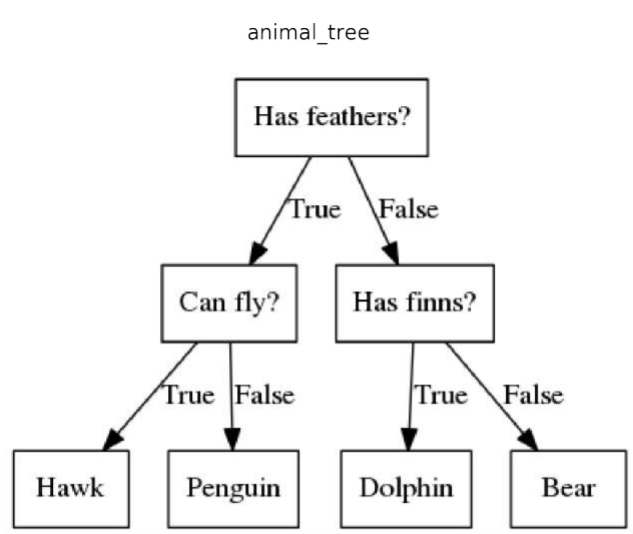


- The deeper the tree, the more complex the decision rules and the fitter the model.

#### Some advantages of decision trees
- Simple to understand and to interpret. Trees can be visualised.

- Requires little data preparation. Other techniques often require data normalisation, 
    dummy variables need to be created and blank values to be removed. 
- Note however that this module does not support missing values.

-  invariant to scaling of the data: As
each feature is processed separately, and the possible splits of the data don't depend
on scaling, no preprocessing like normalization or standardization of features is
needed for decision tree algorithms.
#### Disadvantages of decision trees 
- Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.

- Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.

### TREE-BASED MODELS

non-linear models are non-parametric - mainly focusing on individual features not really about the distance

#### Decision Tree / CART (Classification and Regression Tree)

This is a non-parametric supervised learning algorithm which is utilized for both regression and classification tasks. It is a hierarchical, tree structure which consists of root nodes, branches, internal nodes and leaf nodes
- not susceptible to multicolliearity
- no need for normalization - they don't calculate distance
- no need for linearity between target and features
- advanced package that implement decision tree allows missing values
- however, sci-kit learn package doesn't work with missing values

- pure leaf: all the classification belong to one class
- impure leaf: classification contain both classes

#### how to choose thr best feature at each node
- Information Gain: to explain information gain, you need to understand entropy. Entropy is used to measure the impurity of sample values. Entropy values are between 0 and 1. The higher the value of information gain, the more the model is able to measure how a randomly chosen feature will lead to mis-classification. It is giving of the information about the selection of that variable. Information gain represents the difference in entropy before and after a split on a given attribute
- Gini Impurity : Gini is a technique that measures how often a randomly chosen feature is leading to mis-classification / wrong prediction

#### Pros of Decision Tree
- easy to interpret: it is used in the industry a lot because you can easily interpret your result. You can draw the tree and explain how it is making its decision.
- little to no data preparation is required
- more flexible: used for classification and regression

#### Cons of Decision Tree
- prone to overfitting -it will not stop building the tree to a large depth until it gets a very pure tree. When it so sure you have diabetes. In trying to achieve that, it will continue building thetree.this will make the tree very complex and thus leads to overfitting. 

There are 2 methods of preventing overfitting. 
1. Pre-proning; this will stop the tree from being fully built. This cut off the depth of the 3
2. post-proning: Allow the tree to be fully built and then chunk out the portion of the tree that contains less amount of data
3. Using of a forest of tree: instead of looking one tree, we bring different trees and check their performance; this is where random forest comes in 
- more costly: it is more computationally intensive; it is going to calculate the entropy of all features

#### Import required packages

In [40]:


path = r"C:\Users\ajayi\OneDrive\Desktop\Training_Recordings\Data\Classification_data\telecom_churn.csv"



## Decision tree implementation in scikit-learn

In [39]:
# we can plot the tree 



### Model performance check

In [22]:
# function to compute different metrics to check performance of a regression model
def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check regression model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred_proba = model.predict_proba(predictors)[:, 1]
    # convert the probability to class
    pred_class = np.round(pred_proba > threshold)
    acc = accuracy_score(target, pred_class)  # to compute acuracy
    recall = recall_score(target, pred_class)  # to compute recall
    precision = precision_score(target, pred_class)  # to compute precision
    f1 = f1_score(target, pred_class)  # to compute F1 score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1,
        },
        index=[0],)
    conf = confusion_matrix(target, pred_class)
    plt.figure(figsize=(8, 5))
    sns.heatmap(conf, annot=True, fmt="g")
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")
    plt.show()
 
    return df_perf

## Controlling complexity of Decision Trees
- Typically, building a tree as described above, and continuing until all leaves are pure
leads to models that are very complex and highly overfit to the training data. The
presence of pure leaves mean that a tree is 100% accurate on the training set; each
data point in the training set is in a leaf that has the correct majority class.



- There are two common strategies to prevent overfitting: stopping the creation of the
tree early, also called **pre-pruning**, or building the tree but then removing or collapsing 
nodes that contain little information, also called **post-pruning** or just **pruning**. 
Possible criteria for pre-pruning include limiting the maximum depth of the tree,
limiting the maximum number of leaves, or requiring a minimum number of points
in a node to keep splitting it.

### Applying pre-pruning strategy
- One possible way is to stop building the tree after a certain depth has been reached.
Here we set max_depth=4, meaning only four consecutive questions can be asked.

In [38]:
# Apply pre-pruning by using max_depth of 4 for instance



# train the model



# evaluate on the training and test set





## Alternative Way of drawing Decision Tree Models

In [11]:
#pip install pydotplus

In [12]:
import pydotplus
from IPython.display import Image

## Create a dot data from the tree

In [37]:

# dot_data = tree.export_graphviz(clf2, out_file = None, feature_names = X.columns,
#                                class_names=["0","1"])

# # create a graph from the dot data
# graph = pydotplus.graph_from_dot_data(dot_data)

# # create the tree image from the graph
# Image(graph.create_png())

## Feature Importances
- Instead of looking at the whole tree, which can be taxing, there are some useful statistics that 
we can derive to summarize the workings of the tree. The most commonly used summary is **feature importance**, 
which rates how important each feature is for the decision a tree makes. It is a number between 0 and
1 for each feature, where 0 means "not used at all" and 1 means "perfectly predicts the target".

## Ensembles of Decision Trees
- Ensembles are methods that combine multiple machine learning models to create
more powerful models.
There are many models in the machine learning literature that belong to this category, 
but there are two ensemble models that have proven to be effective on a wide
range of datasets for classification and regression, both of which use decision trees as
their building block: **Random Forests** and **Gradient Boosted Decision Trees**.
    
    
### Random Forests
-  A main drawback of decision trees is that they tend to overfit the
training data. Random forests are one way to address this problem. Random forests are essentially a collection of
decision trees, where each tree is slightly different from the others.
The idea of random forests is that each tree might do a relatively good job of predicting, 
but will likely overfit on part of the data.
If we build many trees, all of which work well and overfit in different ways, we can
reduce the amount of overfitting by averaging their results.


- To build a tree, we first take what is called a bootstrap sample of our data. A bootstrap
sample means from our n_samples data points, we repeatedly draw an example randomly with 
replacement (i.e. the same sample can be picked multiple times), n_samples times. 
This will create a dataset that is as big as the original dataset, but some
data points will be missing from it, and some will be repeated.



- Next, a decision tree is built based on this newly created dataset. However, the algorithm 
we described for the decision tree is slightly modified. Instead of looking for
the best test for each node, in each node the algorithm randomly selects a subset of
the features, and looks for the best possible test involving one of these features. The
amount of features that is selected is controlled by the **max_features** parameter.




- To make a prediction using the random forest, the algorithm first makes a prediction
for every tree in the forest. For regression, we can average these results to get our final
prediction. For classification, a "soft voting" strategy is used. This means each algorithm 
makes a "soft" prediction, providing a probability for each possible output
label. The probabilities predicted by all the trees are averaged, and the class with the
highest label is predicted.

### Implementing Random Forests in scikit learn

In [48]:
# import the random forest model


# instanntiate the classifier


# train the model


# performance scores



### Visualizing feature importances for the Random Forests Algorithm

## Gradient Boosting Machines
- Gradient boosted regression trees is another ensemble method that combines multiple decision trees to a more powerful model. Despite the “regression” in the name,
these models can be used for regression and classification.




- In contrast to random forests, gradient boosting works by building trees in a serial
manner, where each tree tries to correct the mistakes of the previous one. There is no
randomization in gradient boosted regression trees; instead, strong pre-pruning is
used. Gradient boosted trees often use very shallow trees, of depth one to five, often
making the model smaller in terms of memory, and making predictions faster.




- The main idea behind gradient boosting is to combine many simple models (in this
context known as weak learners), like shallow trees. Each tree can only provide good
predictions on part of the data, and so more and more trees are added to iteratively
improve performance.

### Implementing Gradient Boosting in scikit learn

In [49]:
# import the gradient boosting model


# instanntiate the classifier


# train the model


# performance scores



### Reducing Overfitting
- To reduce overfitting, we applt strong pre-pruning by limiting the depth of the tree
- Also, we can adjust the learning rate parameter which controls how each tree tries to correct previous trees. 

In [51]:
# limiting the tree's depth to 1


# train the model





In [52]:
# adjusting the learning rate to 0.01


# train the model




## Exercise
- Apply the Random Forests, Gradient Boosting classifiers to the titanic data.
- Also, perform some hyper-parameter tuning to improve the performance of the best model.